<a href="https://colab.research.google.com/github/psj03283/oral-cancer/blob/main/PAP(07_05_visualization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Library**

In [ ]:
!pip install -q tensorflow
!pip install efficientnet
!pip install tensorflow_addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.4
    Uninstalling typeguard-4.4.4:
      Successfully uninstalled typeguard-4.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
!pip install tensorflow opencv-python matplotlib


In [ ]:
import tensorflow as tf

In [ ]:
from tqdm import tqdm_notebook
ram=[]
for i in tqdm_notebook(range(100)):
  ram.append("randomword"*i)

/tmp/ipython-input-4-2252751400.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(100)):


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import os
import time
import os, glob, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python.keras.utils import get_custom_objects
import efficientnet.tfkeras as efn
from tqdm import tqdm
#import tensorflow_addons as tfa
import openpyxl

In [ ]:
SEED = 42
def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##**Load model**

In [ ]:
import pandas as pd
import numpy as np
import os

# === ✅ Models
models = {
    'RGB': '',
    'H': '_H',
    'E': '_E',
    'DAB': '_DAB'
}

metric = 'accuracy'   # <-- Use accuracy for best model selection
target_class = 'overall'

# === ✅ Store best folds
best_models = {}

for model_name, suffix in models.items():
    fold_scores = []

    for fold in range(1, 5):
        if suffix == '':
            path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}.csv'
        else:
            path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}{suffix}.csv'

        df = pd.read_csv(path)
        final_epoch = df['epoch'].max()

        final_val = df[
            (df['epoch'] == final_epoch) &
            (df['metric'] == metric) &
            (df['class'] == target_class)
        ]['value'].mean()

        fold_scores.append((fold, final_val))

    # Pick the fold with the highest accuracy
    best_fold, best_score = max(fold_scores, key=lambda x: x[1])

    # Build model path
    if suffix == '':
        best_model_path = f"/content/drive/MyDrive/pap_smear/models/model_fold{best_fold}.h5"
    else:
        best_model_path = f"/content/drive/MyDrive/pap_smear/models/model_fold{best_fold}{suffix}.h5"

    # Store
    best_models[model_name] = best_model_path

    print(f"✅ Best fold for {model_name}: Fold {best_fold} (Accuracy: {best_score:.4f})")
    print(f"   Model path: {best_model_path}")

print("\n=== ✅ Best model paths selected ===")
print(best_models)


✅ Best fold for RGB: Fold 3 (Accuracy: 1.0000)
   Model path: /content/drive/MyDrive/pap_smear/models/model_fold3.h5
✅ Best fold for H: Fold 3 (Accuracy: 0.9958)
   Model path: /content/drive/MyDrive/pap_smear/models/model_fold3_H.h5
✅ Best fold for E: Fold 3 (Accuracy: 0.8583)
   Model path: /content/drive/MyDrive/pap_smear/models/model_fold3_E.h5
✅ Best fold for DAB: Fold 3 (Accuracy: 0.9917)
   Model path: /content/drive/MyDrive/pap_smear/models/model_fold3_DAB.h5

=== ✅ Best model paths selected ===
{'RGB': '/content/drive/MyDrive/pap_smear/models/model_fold3.h5', 'H': '/content/drive/MyDrive/pap_smear/models/model_fold3_H.h5', 'E': '/content/drive/MyDrive/pap_smear/models/model_fold3_E.h5', 'DAB': '/content/drive/MyDrive/pap_smear/models/model_fold3_DAB.h5'}


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32') / 255.0   # ✅ SAME as your pipeline
    img_input = np.expand_dims(img, axis=0)

    preds = model.predict(img_input)
    pred_class = np.argmax(preds[0])
    confidence = preds[0][pred_class]

    return pred_class, confidence, preds[0]



##**NILM**

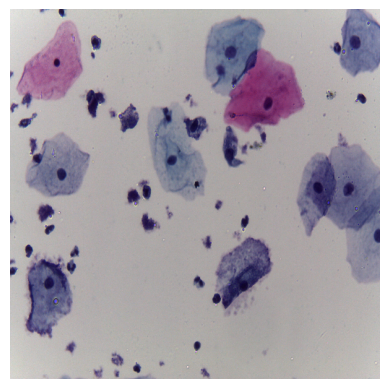

In [ ]:
import cv2
import matplotlib.pyplot as plt

# === ✅ Your original RGB path
RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/0/NL_2_ (14).jpg'

# === ✅ Load the BGR image
bgr_img_origin = cv2.imread(RGB_path)
if bgr_img_origin is None:
    raise ValueError(f"❌ cv2.imread() failed: {RGB_path}")

# === ✅ Convert BGR to RGB
rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)

# === ✅ Resize to 512 × 512
img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

# === ✅ Show it!
plt.imshow(img_resized_RGB)
plt.axis('off')
plt.show()


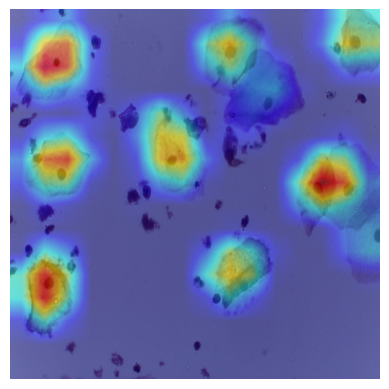

In [ ]:
# === ✅ Grad-CAM function for RGB (correct layer names)
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use input RGB image itself for blending
    img_resized_RGB = img_resized.copy()

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # ✅ Match your actual layer names!
        x = model.get_layer("global_average_pooling2d_3")(x)
        preds = model.get_layer("dense_3")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]
# === ✅ Load the RGB image
img_path = img_paths['RGB']

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)


# === ✅ Path to your saved model for fold 3
model_path = '/content/drive/MyDrive/pap_smear/models/model_fold3.h5'

# === ✅ Load the Keras model (compile=False is fine for inference)
model = tf.keras.models.load_model(model_path, compile=False)


# === ✅ Run Grad-CAM for RGB
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for RGB
plt.imshow(overlay)
plt.axis('off')
plt.show()


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_H.h5
✅ Loaded H model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


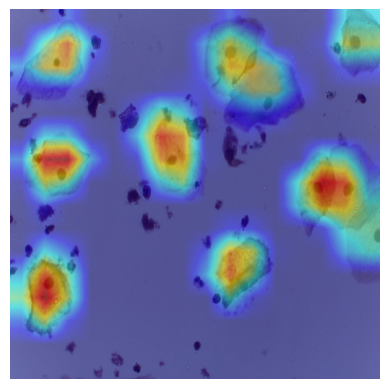

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for H
label = 'H'

# === ✅ Load best H model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with RGB blend from original RGB path
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use your *original* RGB path for blending
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/0/NL_2_ (14).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use the actual GAP and Dense layer names for H
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the H image
img_path = img_paths[label]

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for H
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for H
plt.imshow(overlay)
plt.axis('off')
plt.show()


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_E.h5
✅ Loaded E model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


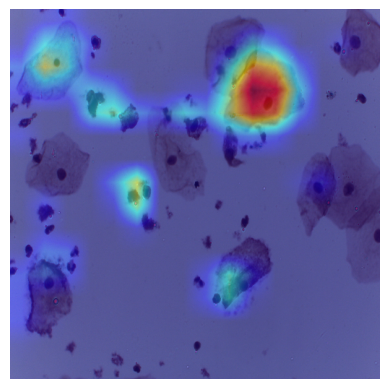

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for E
label = 'E'

# === ✅ Load best E model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with RGB blend from original RGB path
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use your *original* RGB path for blending
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/0/NL_2_ (14).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use your actual GAP and Dense layer names for E
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the E image
img_path = img_paths[label]

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for E
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for E
plt.imshow(overlay)
plt.axis('off')
plt.show()


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_DAB.h5
✅ Loaded DAB model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

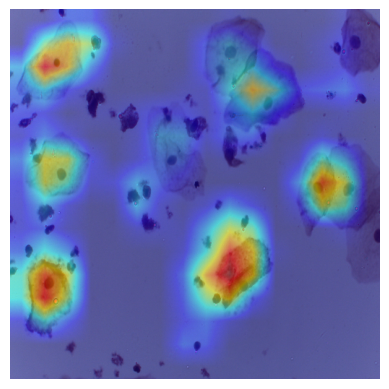

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for DAB
label = 'DAB'

# === ✅ Load best DAB model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with correct layers
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/0/NL_2_ (14).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use the actual GAP and Dense layer names for E
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the DAB image
img_path = img_paths[label]

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for DAB
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for DAB
plt.imshow(overlay)
plt.axis('off')

##**LSIL**

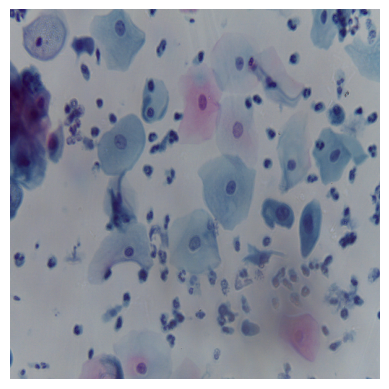

In [ ]:
import cv2
import matplotlib.pyplot as plt

# === ✅ Your original RGB path
RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/1/LSIL_4 (17).jpg'

# === ✅ Load the BGR image
bgr_img_origin = cv2.imread(RGB_path)
if bgr_img_origin is None:
    raise ValueError(f"❌ cv2.imread() failed: {RGB_path}")

# === ✅ Convert BGR to RGB
rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)

# === ✅ Resize to 512 × 512
img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

# === ✅ Show it!
plt.imshow(img_resized_RGB)
plt.axis('off')
plt.show()


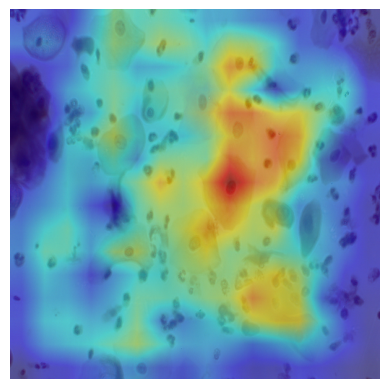

✅ Predicted class index: 1
✅ Probability: 0.9818


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === ✅ Grad-CAM function for RGB
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use input RGB image itself for blending
    img_resized_RGB = img_resized.copy()

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # ✅ Match your actual layer names!
        x = model.get_layer("global_average_pooling2d_3")(x)
        preds = model.get_layer("dense_3")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load your LSIL image for RGB channel
img_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/1/LSIL_4 (17).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)


# === ✅ Path to your saved model for fold 3
model_path = '/content/drive/MyDrive/pap_smear/models/model_fold3.h5'

# === ✅ Load the Keras model (compile=False is fine for inference)
model = tf.keras.models.load_model(model_path, compile=False)

# === ✅ Run Grad-CAM
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot Grad-CAM overlay
plt.imshow(overlay)
plt.axis('off')
plt.show()

# === ✅ Print predicted label and probability
predicted_class = np.argmax(probs)
predicted_prob = np.max(probs)

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_H.h5
✅ Loaded H model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


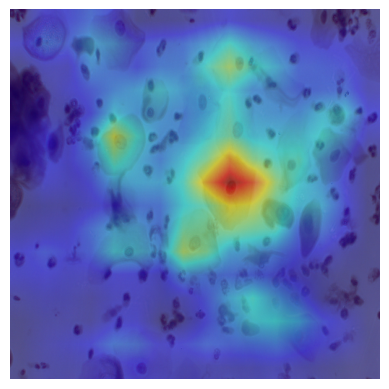

✅ Predicted class index: 1
✅ Probability: 0.9315


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for H
label = 'H'

# === ✅ Load best H model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with RGB blend from original RGB path
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use your *original* RGB path for blending
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/1/LSIL_4 (17).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use the actual GAP and Dense layer names for H
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the H image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_H/val/1/LSIL_4 (17).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for H
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for H
plt.imshow(overlay)
plt.axis('off')
plt.show()


# === ✅ Print predicted label and probability
predicted_class = np.argmax(probs)
predicted_prob = np.max(probs)

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_E.h5
✅ Loaded E model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


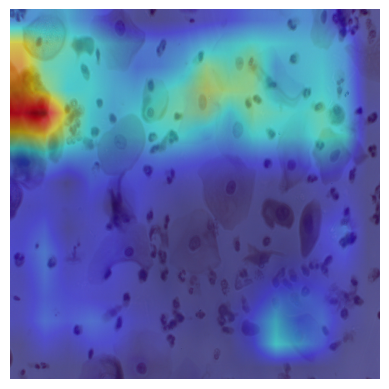

✅ Predicted class index: 1
✅ Probability: 0.9712


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for E
label = 'E'

# === ✅ Load best E model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with RGB blend from original RGB path
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use your *original* RGB path for blending
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/1/LSIL_4 (17).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use your actual GAP and Dense layer names for E
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the E image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_E/val/1/LSIL_4 (17).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for E
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for E
plt.imshow(overlay)
plt.axis('off')
plt.show()

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")

Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_DAB.h5
✅ Loaded DAB model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2
✅ Predicted class index: 1
✅ Probability: 0.9315


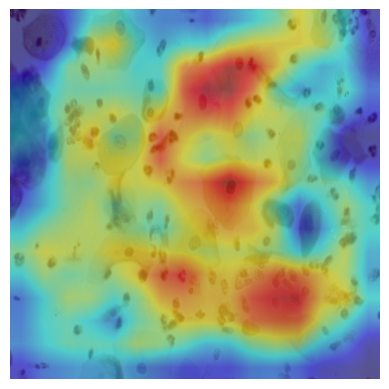

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for DAB
label = 'DAB'

# === ✅ Load best DAB model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with correct layers
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/1/LSIL_4 (17).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use the actual GAP and Dense layer names for E
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the DAB image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_DAB/val/1/LSIL_4 (17).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for DAB
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for DAB
plt.imshow(overlay)
plt.axis('off')

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")

##**HSIL**

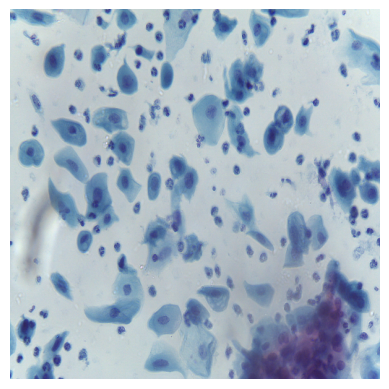

In [ ]:
import cv2
import matplotlib.pyplot as plt

# === ✅ Your original RGB path
RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/2/HSIL_1 (12).jpg'

# === ✅ Load the BGR image
bgr_img_origin = cv2.imread(RGB_path)
if bgr_img_origin is None:
    raise ValueError(f"❌ cv2.imread() failed: {RGB_path}")

# === ✅ Convert BGR to RGB
rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)

# === ✅ Resize to 512 × 512
img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

# === ✅ Show it!
plt.imshow(img_resized_RGB)
plt.axis('off')
plt.show()


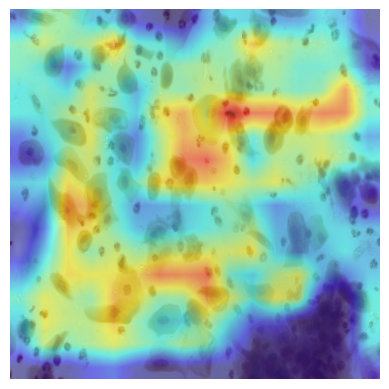

✅ Predicted class index: 2
✅ Probability: 0.9007


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === ✅ Grad-CAM function for RGB
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use input RGB image itself for blending
    img_resized_RGB = img_resized.copy()

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # ✅ Match your actual layer names!
        x = model.get_layer("global_average_pooling2d_3")(x)
        preds = model.get_layer("dense_3")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load your LSIL image for RGB channel
img_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/2/HSIL_1 (12).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)


# === ✅ Path to your saved model for fold 3
model_path = '/content/drive/MyDrive/pap_smear/models/model_fold3.h5'

# === ✅ Load the Keras model (compile=False is fine for inference)
model = tf.keras.models.load_model(model_path, compile=False)

# === ✅ Run Grad-CAM
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot Grad-CAM overlay
plt.imshow(overlay)
plt.axis('off')
plt.show()

# === ✅ Print predicted label and probability
predicted_class = np.argmax(probs)
predicted_prob = np.max(probs)

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_H.h5
✅ Loaded H model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


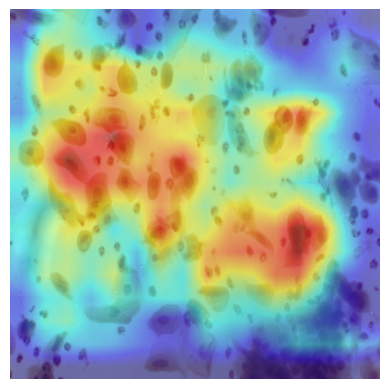

✅ Predicted class index: 2
✅ Probability: 0.9284


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for H
label = 'H'

# === ✅ Load best H model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with RGB blend from original RGB path
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use your *original* RGB path for blending
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/2/HSIL_1 (12).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use the actual GAP and Dense layer names for H
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the H image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_H/val/2/HSIL_1 (12).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for H
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for H
plt.imshow(overlay)
plt.axis('off')
plt.show()


# === ✅ Print predicted label and probability
predicted_class = np.argmax(probs)
predicted_prob = np.max(probs)

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_E.h5
✅ Loaded E model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


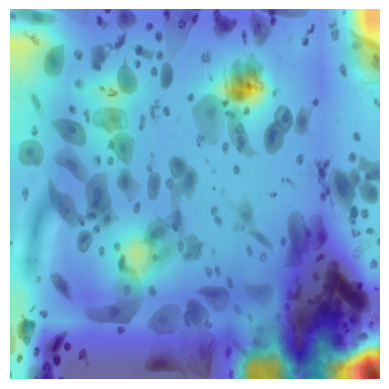

✅ Predicted class index: 2
✅ Probability: 0.9284


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for E
label = 'E'

# === ✅ Load best E model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with RGB blend from original RGB path
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use your *original* RGB path for blending
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/2/HSIL_1 (12).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use your actual GAP and Dense layer names for E
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the E image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_E/val/2/HSIL_1 (12).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for E
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for E
plt.imshow(overlay)
plt.axis('off')
plt.show()

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")

Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_DAB.h5
✅ Loaded DAB model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2
✅ Predicted class index: 2
✅ Probability: 0.9284


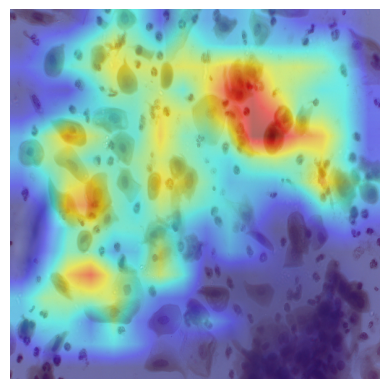

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for DAB
label = 'DAB'

# === ✅ Load best DAB model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with correct layers
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/2/HSIL_1 (12).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use the actual GAP and Dense layer names for E
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the DAB image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_DAB/val/2/HSIL_1 (12).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for DAB
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for DAB
plt.imshow(overlay)
plt.axis('off')

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")

##**SCC**

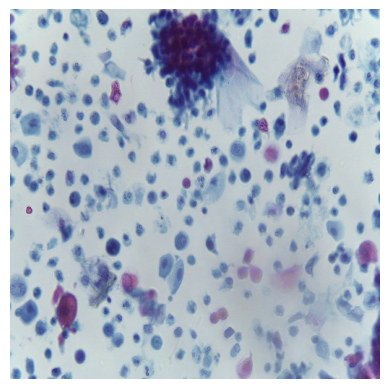

In [ ]:
import cv2
import matplotlib.pyplot as plt

# === ✅ Your original RGB path
RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/3/scc_2 (12).jpg'

# === ✅ Load the BGR image
bgr_img_origin = cv2.imread(RGB_path)
if bgr_img_origin is None:
    raise ValueError(f"❌ cv2.imread() failed: {RGB_path}")

# === ✅ Convert BGR to RGB
rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)

# === ✅ Resize to 512 × 512
img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

# === ✅ Show it!
plt.imshow(img_resized_RGB)
plt.axis('off')
plt.show()


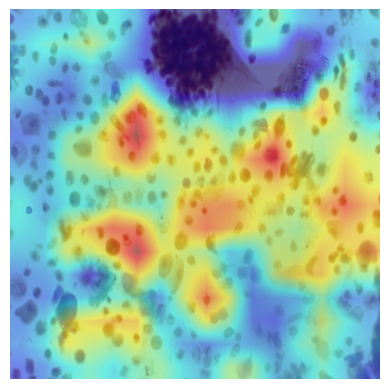

✅ Predicted class index: 3
✅ Probability: 0.8139


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === ✅ Grad-CAM function for RGB
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use input RGB image itself for blending
    img_resized_RGB = img_resized.copy()

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # ✅ Match your actual layer names!
        x = model.get_layer("global_average_pooling2d_3")(x)
        preds = model.get_layer("dense_3")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load your LSIL image for RGB channel
img_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/3/scc_2 (12).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)


# === ✅ Path to your saved model for fold 3
model_path = '/content/drive/MyDrive/pap_smear/models/model_fold3.h5'

# === ✅ Load the Keras model (compile=False is fine for inference)
model = tf.keras.models.load_model(model_path, compile=False)

# === ✅ Run Grad-CAM
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot Grad-CAM overlay
plt.imshow(overlay)
plt.axis('off')
plt.show()

# === ✅ Print predicted label and probability
predicted_class = np.argmax(probs)
predicted_prob = np.max(probs)

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_H.h5
✅ Loaded H model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


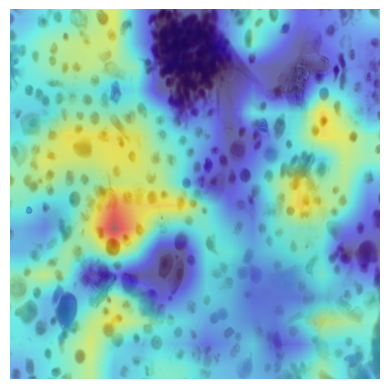

✅ Predicted class index: 3
✅ Probability: 0.6641


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for H
label = 'H'

# === ✅ Load best H model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with RGB blend from original RGB path
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use your *original* RGB path for blending
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/3/scc_2 (12).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use the actual GAP and Dense layer names for H
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the H image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_H/val/3/scc_2 (12).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for H
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for H
plt.imshow(overlay)
plt.axis('off')
plt.show()


# === ✅ Print predicted label and probability
predicted_class = np.argmax(probs)
predicted_prob = np.max(probs)

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")


Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_E.h5
✅ Loaded E model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2


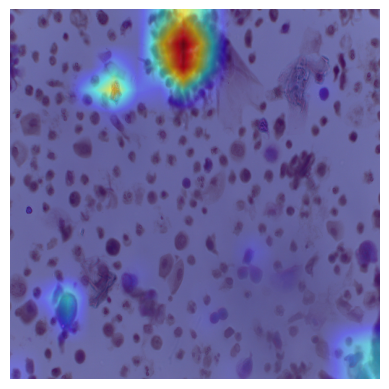

✅ Predicted class index: 3
✅ Probability: 0.6641


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for E
label = 'E'

# === ✅ Load best E model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with RGB blend from original RGB path
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))

    # ✅ Use your *original* RGB path for blending
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/3/scc_2 (12).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use your actual GAP and Dense layer names for E
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the E image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_E/val/3/scc_2 (12).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for E
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for E
plt.imshow(overlay)
plt.axis('off')
plt.show()

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")

Loading model: /content/drive/MyDrive/pap_smear/models/model_fold3_DAB.h5
✅ Loaded DAB model.

🔍 Model Layers:
input_layer_4
efficientnet-b0
global_average_pooling2d_2
dense_2
✅ Predicted class index: 3
✅ Probability: 0.6641


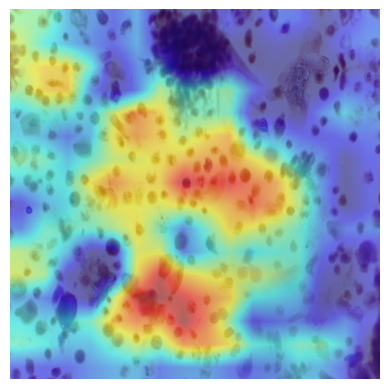

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === ✅ Pick the label for DAB
label = 'DAB'

# === ✅ Load best DAB model
model_path = best_models[label]
print(f"Loading model: {model_path}")

model = tf.keras.models.load_model(model_path, compile=False)
print(f"✅ Loaded {label} model.")

# === ✅ Check layer names so you match exactly
print("\n🔍 Model Layers:")
for layer in model.layers:
    print(layer.name)

# === ✅ Grad-CAM function with correct layers
def grad_cam_overlay_final(model, image_rgb, class_idx=None, alpha=0.5):
    img_resized = cv2.resize(image_rgb, (512, 512))
    RGB_path = '/content/drive/My Drive/pap_smear/folds/fold3/val/3/scc_2 (12).jpg'
    bgr_img_origin = cv2.imread(RGB_path)
    rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)
    img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

    img_pre = img_resized.astype(np.float32) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_pre, axis=0), dtype=tf.float32)

    base_model = model.get_layer("efficientnet-b0")
    conv_layer = base_model.get_layer("top_conv")

    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=conv_layer.output)
    conv_output = feature_extractor(img_tensor)

    with tf.GradientTape() as tape:
        tape.watch(conv_output)
        x = base_model.get_layer("top_bn")(conv_output)
        x = base_model.get_layer("top_activation")(x)

        # === ✅ Use the actual GAP and Dense layer names for E
        x = model.get_layer("global_average_pooling2d_2")(x)
        preds = model.get_layer("dense_2")(x)

        if class_idx is None:
            class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap_resized = cv2.resize(heatmap.numpy(), (512, 512))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap_color, 0.5, img_resized_RGB.astype(np.uint8), 0.5, 0)

    return overlay[..., ::-1], preds.numpy()[0]

# === ✅ Load the DAB image
img_path = '/content/drive/My Drive/pap_smear/folds/fold3_DAB/val/3/scc_2 (12).jpg'

bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# === ✅ Run Grad-CAM for DAB
overlay, probs = grad_cam_overlay_final(model, rgb_img, alpha=0.5)

# === ✅ Plot for DAB
plt.imshow(overlay)
plt.axis('off')

print(f"✅ Predicted class index: {predicted_class}")
print(f"✅ Probability: {predicted_prob:.4f}")

##**Extraction**

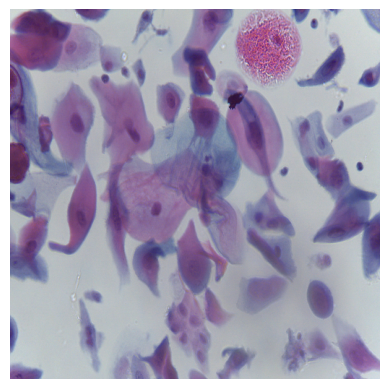

In [ ]:
import cv2
import matplotlib.pyplot as plt

# === ✅ Your original RGB path
RGB_path = '/content/drive/My Drive/pap_smear/SCC/scc_1 (11).jpg'

# === ✅ Load the BGR image
bgr_img_origin = cv2.imread(RGB_path)
if bgr_img_origin is None:
    raise ValueError(f"❌ cv2.imread() failed: {RGB_path}")

# === ✅ Convert BGR to RGB
rgb_img_origin = cv2.cvtColor(bgr_img_origin, cv2.COLOR_BGR2RGB)

# === ✅ Resize to 512 × 512
img_resized_RGB = cv2.resize(rgb_img_origin, (512, 512))

# === ✅ Show it!
plt.imshow(img_resized_RGB)
plt.axis('off')
plt.show()


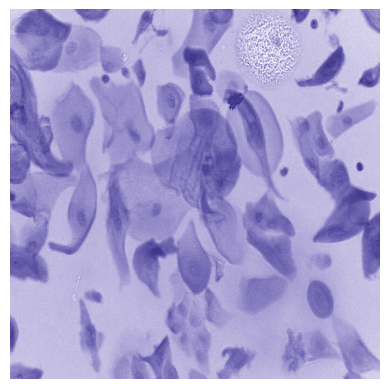

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load image
image_path = '/content/drive/My Drive/pap_smear/SCC/scc_1 (11).jpg'
pos_img_bgr = cv2.imread(image_path)
pos_img_rgb = cv2.cvtColor(pos_img_bgr, cv2.COLOR_BGR2RGB)

# Your Pap stain matrix (example)
pap_matrix = np.array([
    [0.18, 0.01, 0.1],  # R
    [0.2, 0.13, 0.21],  # G
    [0.08, 0.01, 0.29],  # B
]).T  # shape (3, 3)

channels = ['Haematoxylin', 'Eosin', 'DAB']


pos_img_bright = np.clip(pos_img_rgb * 1, 0, 255).astype(np.uint8)

# Normalize for OD
rgb_norm = pos_img_bright / 255.0 + 1e-8  # avoid log(0)
OD = -np.log(rgb_norm)

# Separate stains
stains_OD = np.dot(OD, np.linalg.inv(pap_matrix))

# Reconstruct each stain (grayscale, no extra hue)
reconstructed_rgb = []
for i in range(3):
    only_one_OD = np.zeros_like(stains_OD)
    only_one_OD[:, :, i] = stains_OD[:, :, i]
    OD_recon = np.dot(only_one_OD, pap_matrix)
    rgb_recon = np.exp(-OD_recon)
    rgb_recon = np.clip(rgb_recon, 0, 1)
    reconstructed_rgb.append(rgb_recon)


import cv2
import numpy as np

# === ✅ Extract the Haematoxylin channel ===
H_channel_rgb = reconstructed_rgb[0]  # shape (H, W, 3), float [0,1]

# === ✅ Rescale to 0–255 and convert to uint8 ===
H_channel_rgb_uint8 = np.clip(H_channel_rgb * 255, 0, 255).astype(np.uint8)

# === ✅ Resize to 512 × 512 ===
H_channel_rgb_resized = cv2.resize(H_channel_rgb_uint8, (512, 512))

# === ✅ If you want to confirm shape:
plt.imshow(H_channel_rgb_resized)
plt.axis('off')
plt.show()


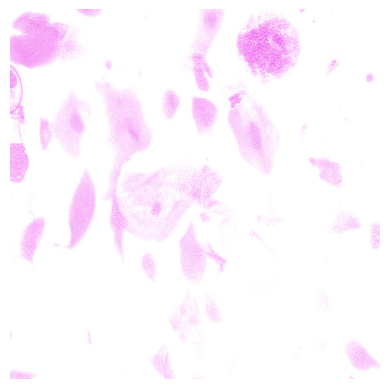

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load image
image_path = '/content/drive/My Drive/pap_smear/SCC/scc_1 (11).jpg'
pos_img_bgr = cv2.imread(image_path)
pos_img_rgb = cv2.cvtColor(pos_img_bgr, cv2.COLOR_BGR2RGB)

# Your Pap stain matrix (example)
pap_matrix = np.array([
    [0.18, 0.01, 0.1],  # R
    [0.2, 0.13, 0.21],  # G
    [0.08, 0.01, 0.29],  # B
]).T  # shape (3, 3)

channels = ['Haematoxylin', 'Eosin', 'DAB']


pos_img_bright = np.clip(pos_img_rgb * 1, 0, 255).astype(np.uint8)

# Normalize for OD
rgb_norm = pos_img_bright / 255.0 + 1e-8  # avoid log(0)
OD = -np.log(rgb_norm)

# Separate stains
stains_OD = np.dot(OD, np.linalg.inv(pap_matrix))

# Reconstruct each stain (grayscale, no extra hue)
reconstructed_rgb = []
for i in range(3):
    only_one_OD = np.zeros_like(stains_OD)
    only_one_OD[:, :, i] = stains_OD[:, :, i]
    OD_recon = np.dot(only_one_OD, pap_matrix)
    rgb_recon = np.exp(-OD_recon)
    rgb_recon = np.clip(rgb_recon, 0, 1)
    reconstructed_rgb.append(rgb_recon)


import cv2
import numpy as np

# === ✅ Extract the Eosin channel ===
H_channel_rgb = reconstructed_rgb[1]  # shape (H, W, 3), float [0,1]

# === ✅ Rescale to 0–255 and convert to uint8 ===
H_channel_rgb_uint8 = np.clip(H_channel_rgb * 255, 0, 255).astype(np.uint8)

# === ✅ Resize to 512 × 512 ===
H_channel_rgb_resized = cv2.resize(H_channel_rgb_uint8, (512, 512))

# === ✅ If you want to confirm shape:
plt.imshow(H_channel_rgb_resized)
plt.axis('off')
plt.show()


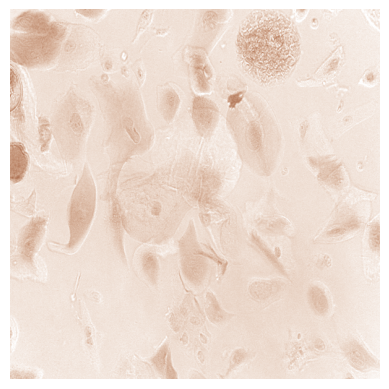

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load image
image_path = '/content/drive/My Drive/pap_smear/SCC/scc_1 (11).jpg'
pos_img_bgr = cv2.imread(image_path)
pos_img_rgb = cv2.cvtColor(pos_img_bgr, cv2.COLOR_BGR2RGB)

# Your Pap stain matrix (example)
pap_matrix = np.array([
    [0.18, 0.01, 0.1],  # R
    [0.2, 0.13, 0.21],  # G
    [0.08, 0.01, 0.29],  # B
]).T  # shape (3, 3)

channels = ['Haematoxylin', 'Eosin', 'DAB']


pos_img_bright = np.clip(pos_img_rgb * 1, 0, 255).astype(np.uint8)

# Normalize for OD
rgb_norm = pos_img_bright / 255.0 + 1e-8  # avoid log(0)
OD = -np.log(rgb_norm)

# Separate stains
stains_OD = np.dot(OD, np.linalg.inv(pap_matrix))

# Reconstruct each stain (grayscale, no extra hue)
reconstructed_rgb = []
for i in range(3):
    only_one_OD = np.zeros_like(stains_OD)
    only_one_OD[:, :, i] = stains_OD[:, :, i]
    OD_recon = np.dot(only_one_OD, pap_matrix)
    rgb_recon = np.exp(-OD_recon)
    rgb_recon = np.clip(rgb_recon, 0, 1)
    reconstructed_rgb.append(rgb_recon)


import cv2
import numpy as np

# === ✅ Extract the DAB channel ===
H_channel_rgb = reconstructed_rgb[2]  # shape (H, W, 3), float [0,1]

# === ✅ Rescale to 0–255 and convert to uint8 ===
H_channel_rgb_uint8 = np.clip(H_channel_rgb * 255, 0, 255).astype(np.uint8)

# === ✅ Resize to 512 × 512 ===
H_channel_rgb_resized = cv2.resize(H_channel_rgb_uint8, (512, 512))

# === ✅ If you want to confirm shape:
plt.imshow(H_channel_rgb_resized)
plt.axis('off')
plt.show()


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

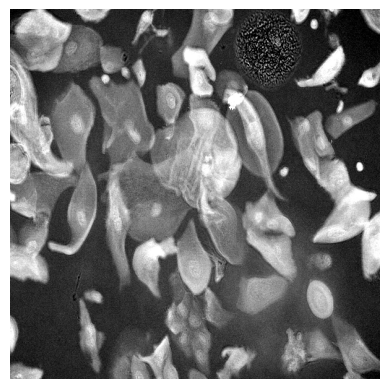

In [ ]:
gray_img = reconstructed_rgb[0].mean(axis=2)

# ✅ Stretch intensity for better contrast
p1 = np.percentile(gray_img, 1)
p99 = np.percentile(gray_img, 99)
gray_img_stretched = np.clip(gray_img, p1, p99)
gray_img_norm = (gray_img_stretched - p1) / (p99 - p1 + 1e-8)

gray_img_final = cv2.resize(gray_img_norm, (512, 512))
plt.imshow(gray_img_final, cmap='gray_r')
plt.axis('off')


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

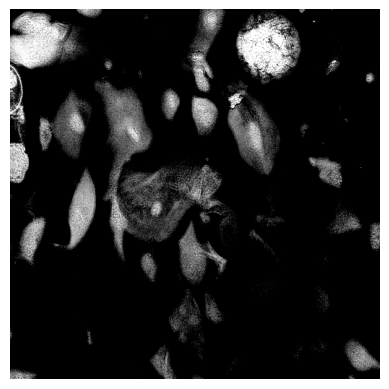

In [ ]:
gray_img = reconstructed_rgb[1].mean(axis=2)

# ✅ Stretch intensity for better contrast
p1 = np.percentile(gray_img, 1)
p99 = np.percentile(gray_img, 99)
gray_img_stretched = np.clip(gray_img, p1, p99)
gray_img_norm = (gray_img_stretched - p1) / (p99 - p1 + 1e-8)

gray_img_final = cv2.resize(gray_img_norm, (512, 512))
plt.imshow(gray_img_final, cmap='gray_r')
plt.axis('off')


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

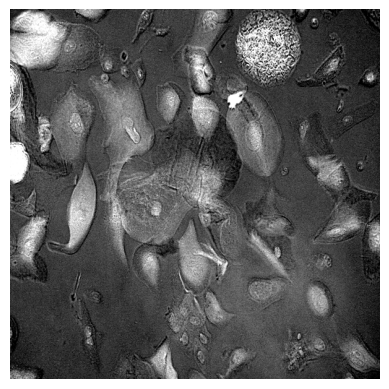

In [ ]:
gray_img = reconstructed_rgb[2].mean(axis=2)

# ✅ Stretch intensity for better contrast
p1 = np.percentile(gray_img, 1)
p99 = np.percentile(gray_img, 99)
gray_img_stretched = np.clip(gray_img, p1, p99)
gray_img_norm = (gray_img_stretched - p1) / (p99 - p1 + 1e-8)

gray_img_final = cv2.resize(gray_img_norm, (512, 512))
plt.imshow(gray_img_final, cmap='gray_r')
plt.axis('off')


##**Model layer**

In [ ]:
import tensorflow as tf

# ✅ Load your saved Keras model
model_path = "/content/drive/MyDrive/pap_smear/models/model_fold3.h5"
model = tf.keras.models.load_model(model_path, compile=False)

print(f"✅ Model loaded from: {model_path}\n")
print("🔍 Available layers in the model:")

# ✅ Loop through layers and print their names
for layer in model.layers:
    print(f"- {layer.name}")


✅ Model loaded from: /content/drive/MyDrive/pap_smear/models/model_fold3.h5

🔍 Available layers in the model:
- input_layer_6
- efficientnet-b0
- global_average_pooling2d_3
- dense_3


In [ ]:
import tensorflow as tf

# ✅ Load your saved Keras model
model_path = "/content/drive/MyDrive/pap_smear/models/model_fold3_H.h5"
model = tf.keras.models.load_model(model_path, compile=False)

print(f"✅ Model loaded from: {model_path}\n")
print("🔍 Available layers in the model:")

# ✅ Loop through layers and print their names
for layer in model.layers:
    print(f"- {layer.name}")


✅ Model loaded from: /content/drive/MyDrive/pap_smear/models/model_fold3_H.h5

🔍 Available layers in the model:
- input_layer_4
- efficientnet-b0
- global_average_pooling2d_2
- dense_2


In [ ]:
import tensorflow as tf

# Load the saved Keras model
model_path = "/content/drive/MyDrive/pap_smear/models/model_fold3.h5"
model = tf.keras.models.load_model(model_path, compile=False)

print(f"✅ Model loaded from: {model_path}\n")

# Print full model summary: includes input/output shapes, params, etc.
model.summary()


✅ Model loaded from: /content/drive/MyDrive/pap_smear/models/model_fold3.h5



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnet-b0 (Functional)    │ (None, 16, 16, 1280)   │     4,049,564 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,688 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,016 (164.12 KB)

In [ ]:
pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 11.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


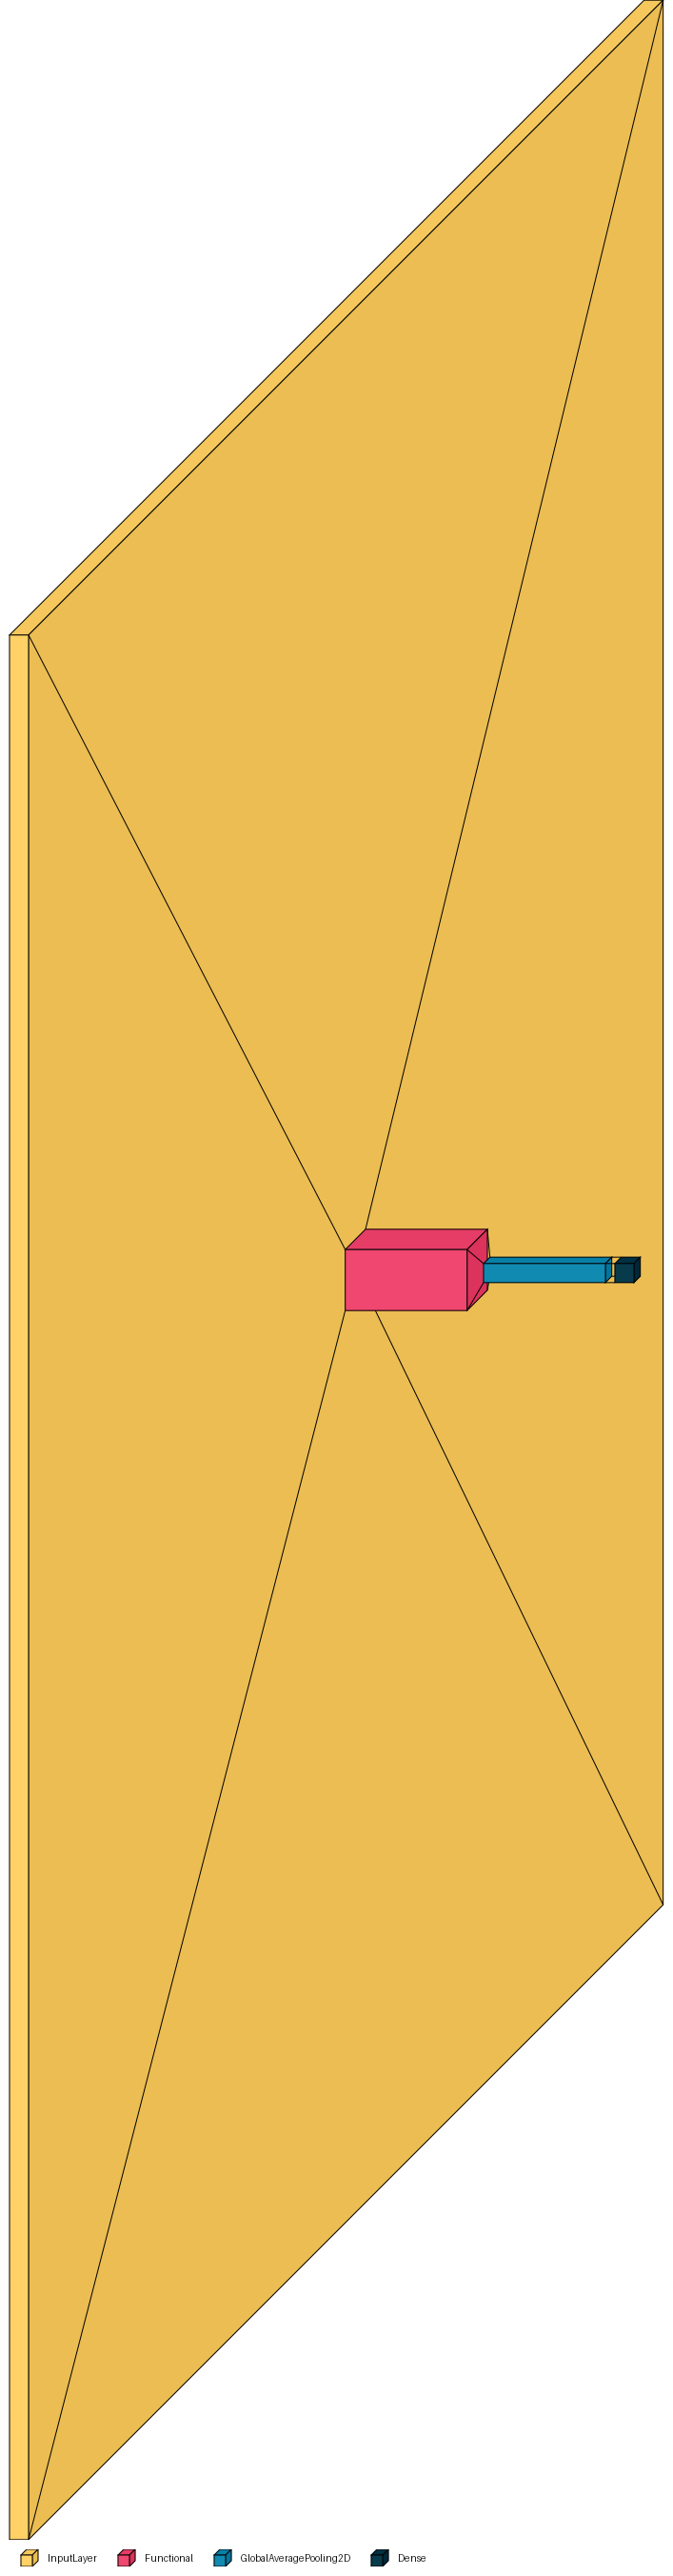

In [ ]:
import tensorflow as tf
import visualkeras

# Load your model
model = tf.keras.models.load_model('/content/drive/MyDrive/pap_smear/models/model_fold3.h5', compile=False)

# Visualize and save as image
visualkeras.layered_view(model, legend=True, draw_volume=True, to_file='model_architecture.png')


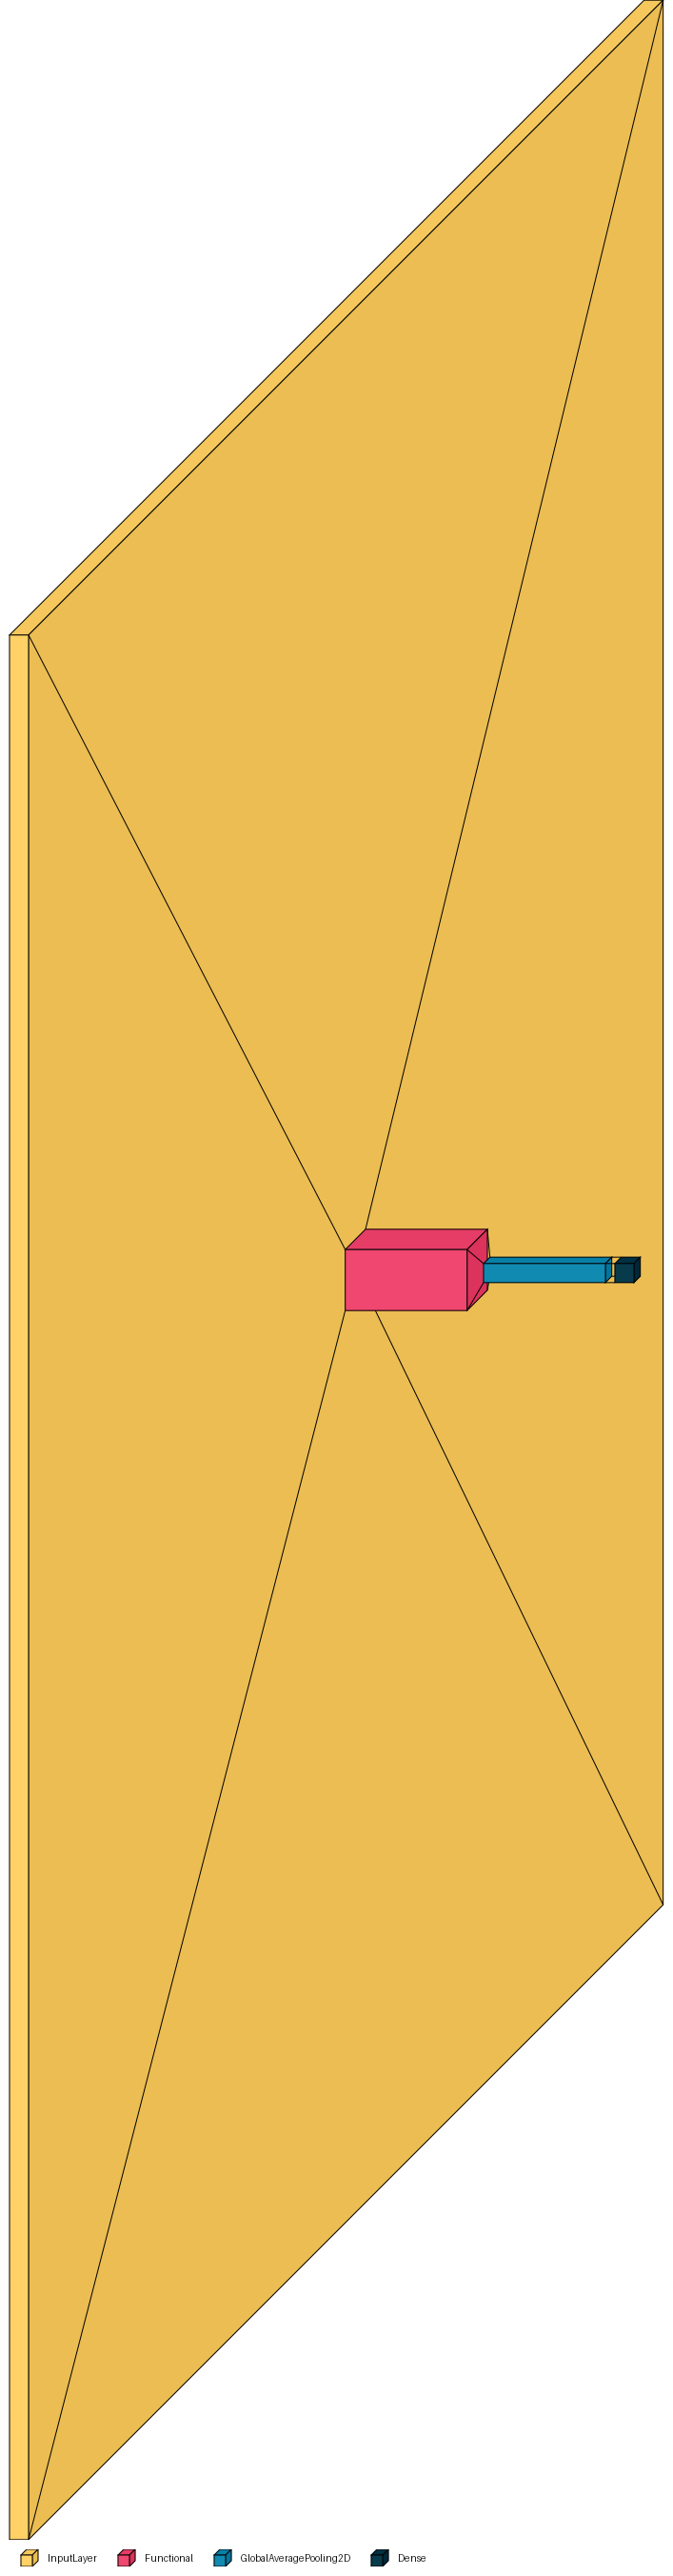

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True, to_file='efficientnetb0_visual.png')
